# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_csv = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_df=pd.DataFrame([],columns=['City','City_ID','Country',
                                    'Date unix, UTC',
                                    'lon', 'lat', 
                                    'Max Temperature (F)', 
                                    'Humidity (%)', 
                                    'Cloudiness (%)',
                                    'Wind Speed (mph)'])
city_notfound=[]
for index,city in enumerate(cities,start=1):
    print(f'{index} City {city}')
    payload={'appid':wkey,'q':city,'units':'imperial'}
    response = requests.get(url,params=payload).json()
    if response['cod']!="404":
        response_ser=pd.Series([response['name'],response['id'],
                                response['sys']['country'],
                                response['dt'],
                                response['coord']['lon'],
                                response['coord']['lat'],
                                response['main']['temp_max'],
                                response['main']['humidity'],
                                response['clouds']['all'],
                                response['wind']['speed']],
                  index=weather_df.columns)
        weather_df=weather_df.append(response_ser,ignore_index=True )
#        print(response_ser)
    else:
        print(f'{city} is not found \n')
        city_notfound+=[city]
    

1 City bredasdorp
2 City ushuaia
3 City new norfolk
4 City georgetown
5 City hambantota
6 City hermanus
7 City bluff
8 City saint-leu
9 City atuona
10 City sisimiut
11 City mataura
12 City sitka
13 City olafsvik
14 City gimli
15 City acarau
16 City bridlington
17 City barrow
18 City aswan
19 City illoqqortoormiut
illoqqortoormiut is not found 

20 City vilyuysk
21 City cabo san lucas
22 City busselton
23 City rikitea
24 City chokurdakh
25 City puerto madero
26 City victoria
27 City barawe
barawe is not found 

28 City port lincoln
29 City yellowknife
30 City kaitangata
31 City caravelas
32 City jamestown
33 City segou
34 City punta arenas
35 City praia da vitoria
36 City bathsheba
37 City lagoa
38 City bin qirdan
39 City sibu
40 City butaritari
41 City ceyhan
42 City baghdad
43 City nizhneyansk
nizhneyansk is not found 

44 City tuatapere
45 City tuktoyaktuk
46 City arak
47 City kunya
48 City pahrump
49 City channel-port aux basques
50 City jinchang
51 City kapaa
52 City saint george
5

414 City hami
415 City mount isa
416 City nsanje
417 City lac du bonnet
418 City trincomalee
419 City angoche
420 City horsham
421 City cockburn harbour
cockburn harbour is not found 

422 City jarocin
423 City mamallapuram
424 City gat
425 City codrington
426 City murgab
427 City viligili
viligili is not found 

428 City palabuhanratu
palabuhanratu is not found 

429 City dukat
430 City mangan
431 City hadejia
432 City mahibadhoo
433 City bairiki
434 City diamantino
435 City beloha
436 City chemal
437 City pochutla
438 City alihe
439 City yeppoon
440 City rundu
441 City ribeira grande
442 City yako
443 City cairns
444 City alice springs
445 City saint-augustin
446 City zhigalovo
447 City lagunas
448 City naze
449 City skaerbaek
450 City ketchikan
451 City shimanovsk
452 City clyde river
453 City ixtapa
454 City balsas
455 City fairbanks
456 City taki
457 City palu
458 City lavrentiya
459 City kropotkin
460 City myitkyina
461 City petrolina
462 City imeni sverdlova
463 City kloulklubed

In [7]:
len(city_notfound)

43

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# we will export Clean file

In [9]:
weather_df

,City,City_ID,Country,"Date unix, UTC",lon,lat,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bredasdorp,1015776,ZA,1608135493,20.04,-34.53,69.80,56,0,8.05
1,Ushuaia,3833367,AR,1608135432,-68.30,-54.80,48.20,70,75,6.93
2,New Norfolk,2155415,AU,1608135717,147.06,-42.78,54.00,79,100,1.28
3,George Town,1735106,MY,1608135717,100.34,5.41,78.80,94,40,2.24
4,Hambantota,1244926,LK,1608135717,81.12,6.12,77.00,100,40,4.70
...,...,...,...,...,...,...,...,...,...,...
557,Wanning,1791779,CN,1608135792,110.40,18.80,65.25,85,92,12.75
558,Muravlenko,1540711,RU,1608135792,74.52,63.79,-2.04,93,98,11.10
559,Benjamin Constant,3665016,BR,1608135793,-70.03,-4.38,84.20,74,40,4.70
560,Poum,2138555,NC,1608135504,164.02,-20.23,78.48,73,42,17.54


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity100_df=weather_df.loc[weather_df['Humidity (%)']>100]
humidity100_df

,City,City_ID,Country,"Date unix, UTC",lon,lat,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df=pd.concat([weather_df,humidity100_df]).drop_duplicates(keep=False)

In [95]:
# create CSV file so we do not have to api all the times..
# clean_df.to_csv('output_data\my_city_weather.csv') # already created

#read from csv 
clean_df=pd.read_csv('output_data\my_city_weather.csv', index_col=0)
clean_df.head()

,City,City_ID,Country,"Date unix, UTC",lon,lat,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bredasdorp,1015776,ZA,1608135493,20.04,-34.53,69.8,56,0,8.05
1,Ushuaia,3833367,AR,1608135432,-68.30,-54.80,48.2,70,75,6.93
2,New Norfolk,2155415,AU,1608135717,147.06,-42.78,54.0,79,100,1.28
3,George Town,1735106,MY,1608135717,100.34,5.41,78.8,94,40,2.24
4,Hambantota,1244926,LK,1608135717,81.12,6.12,77.0,100,40,4.70


In [94]:
my_date = time.ctime(clean_df['Date unix, UTC'][2])
my_date

'Wed Dec 16 10:21:57 2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

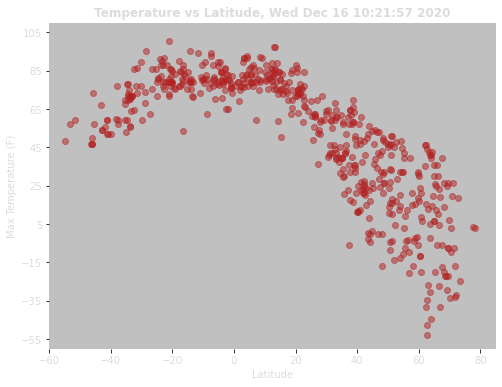

In [59]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['axes.facecolor'] = 'silver'
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
plt.ylim(-60, 110)    
plt.xlim(-60, 85)
color_t='gainsboro'
colors='firebrick'
plt.yticks(range(-55, 110, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'Temperature vs Latitude, {my_date}', color=color_t,fontweight="bold")
plt.ylabel('Max Temperature (F)', color=color_t)
plt.xlabel('Latitude', color=color_t)
lat=clean_df['lat']
temp=clean_df['Max Temperature (F)']
plot1=plt.scatter(lat,temp,color=colors, 
                  marker='o',alpha=0.5,
                  label=colors)
plt.savefig('output_data/temp_lat.png', facecolor='dimgray')

code above plots scatter of temperature vs latitude - u can observe 
summer in south hemisphere and sub-freezing temperature indicate winter season

## Latitude vs. Humidity Plot

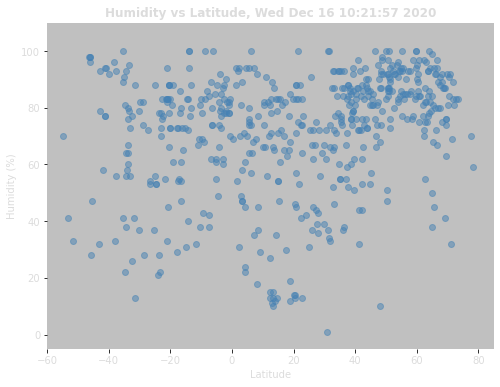

In [81]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['axes.facecolor'] = 'silver'
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
plt.ylim(-5, 110)    
plt.xlim(-60, 85)
color_t='gainsboro'
colors='steelblue'
plt.yticks(range(0, 110, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'Humidity vs Latitude, {my_date}', color=color_t,fontweight="bold")
plt.ylabel('Humidity (%)', color=color_t)
plt.xlabel('Latitude', color=color_t)
lat=clean_df['lat']
humid=clean_df['Humidity (%)']
plot1=plt.scatter(lat,humid,color=colors, 
                  marker='o',alpha=0.5,
                  label=colors)
plt.savefig('output_data/hum_lat.png', facecolor='dimgray')

code above plots scatter of humidity vs latitude - we can observe 
some dense area

## Latitude vs. Cloudiness Plot

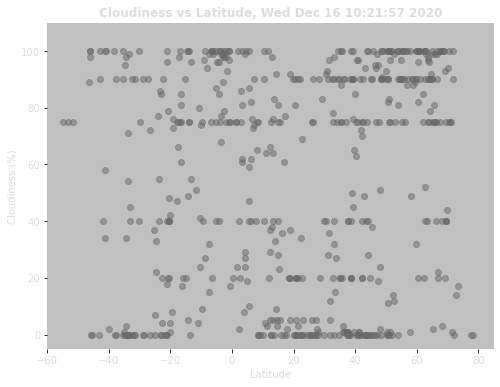

In [64]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['axes.facecolor'] = 'silver'
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
plt.ylim(-5, 110)    
plt.xlim(-60, 85)
color_t='gainsboro'
colors='dimgray'
plt.yticks(range(0, 110, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'Cloudiness vs Latitude, {my_date}', color=color_t,fontweight="bold")
plt.ylabel('Cloudiness (%)', color=color_t)
plt.xlabel('Latitude', color=color_t)
lat=clean_df['lat']
cloud=clean_df['Cloudiness (%)']
plot1=plt.scatter(lat,cloud,color=colors, 
                  marker='o',alpha=0.5,
                  label=colors)
plt.savefig('output_data/cloud_lat.png', facecolor='dimgray')

code above plots scatter of cloudiness vs latitude - we can observe 
some  grouping around 0, 20, 40, 75, 90, 100% lines ... this could be due to the way cloudiness is measured/evaluated

## Latitude vs. Wind Speed Plot

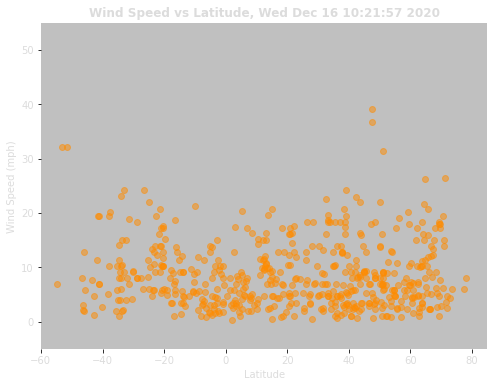

In [65]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['axes.facecolor'] = 'silver'
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
plt.ylim(-5, 55)    
plt.xlim(-60, 85)
colors='darkorange'
color_t='gainsboro'
plt.yticks(range(0, 55, 10), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'Wind Speed vs Latitude, {my_date}', color=color_t,fontweight="bold")
plt.ylabel('Wind Speed (mph)', color=color_t)
plt.xlabel('Latitude', color=color_t)
wind=clean_df['Wind Speed (mph)']
lat=clean_df['lat']
plot1=plt.scatter(lat,wind,color=colors, 
                  marker='o',alpha=0.5,
                  label=colors)
plt.savefig('output_data/wind_lat.png', facecolor='dimgray')

code above plots scatter of wind speed vs latitude - we can observe 
some  grouping below 10 mph 

## Linear Regression

In [18]:
south_df=clean_df.loc[clean_df['lat']<0]
north_df=clean_df.loc[clean_df['lat']>0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

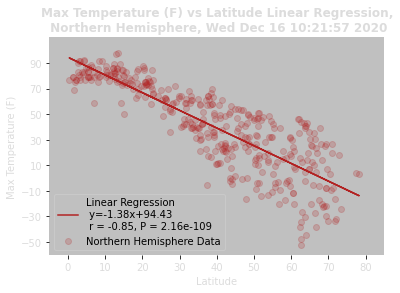

In [67]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-60, 110)    
plt.xlim(-5,85)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Northern'
#data for plot
lat=north_df['lat']
y_value=north_df['Max Temperature (F)']
y_name=y_value.name
# setting up plot 
plt.yticks(range(-50, 110, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot1=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='lower left')
plt.savefig('output_data/temp_north_r.png', facecolor='dimgray')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

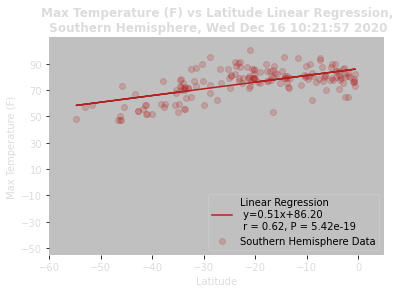

In [68]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot5= plt.subplot(111)
plot5.spines["top"].set_visible(False)    
plot5.spines["bottom"].set_visible(False)    
plot5.spines["right"].set_visible(False)    
plot5.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-55, 110)    
plt.xlim(-60,5)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Southern'
#data for plot
lat=south_df['lat']
y_value=south_df['Max Temperature (F)']
y_name=y_value.name
#setting up plot
plt.yticks(range(-50, 110, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot5=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='lower right')
plt.savefig('output_data/temp_south_r.png', facecolor='dimgray')

we can observe ver strong  positive correlation between latitude and temperature for S. Hemisphere , and even stronger negative correlation between latitude and temp in northern hemisphere ( due to winter time in Nothern hemisphere it is stornger)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

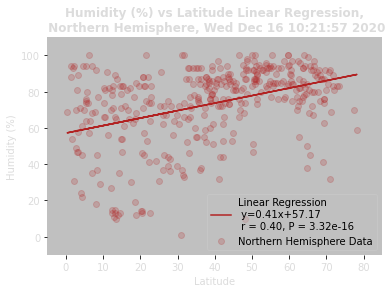

In [69]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot6= plt.subplot(111)
plot6.spines["top"].set_visible(False)    
plot6.spines["bottom"].set_visible(False)    
plot6.spines["right"].set_visible(False)    
plot6.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 110)    
plt.xlim(-5,85)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Northern'
#data for plot
lat=north_df['lat']
y_value=north_df['Humidity (%)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 101, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot6=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='lower right', framealpha=0.5)
plt.savefig('output_data/hum_north_r.png', facecolor='dimgray')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

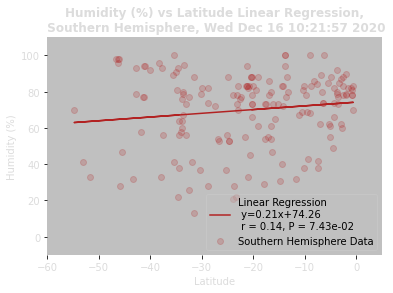

In [70]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot7= plt.subplot(111)
plot7.spines["top"].set_visible(False)    
plot7.spines["bottom"].set_visible(False)    
plot7.spines["right"].set_visible(False)    
plot7.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 110)    
plt.xlim(-60,5)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Southern'
#data for plot
lat=south_df['lat']
y_value=south_df['Humidity (%)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 101, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot7=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='lower right', framealpha=0.5)
plt.savefig('output_data/hum_south_r.png', facecolor='dimgray')

Both hemisphere's humidity vs latitude correlations are positive , and northern hemispshere is somewhat stronger - coef of correlation 0.4 vs 0.2 . However this relationship might be affected by cloudiness

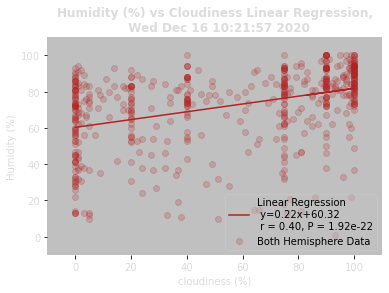

In [92]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot7= plt.subplot(111)
plot7.spines["top"].set_visible(False)    
plot7.spines["bottom"].set_visible(False)    
plot7.spines["right"].set_visible(False)    
plot7.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 110)    
plt.xlim(-10,110)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Both'
#data for plot
lat=clean_df['Cloudiness (%)']
y_value=clean_df['Humidity (%)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 101, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Cloudiness Linear Regression,\n  {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('cloudiness (%)', color=color_t)
plot7=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors, label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e}")
plt.legend(loc='lower right', framealpha=0.5)
plt.savefig('output_data/hum_cloud_r.png', facecolor='dimgray')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

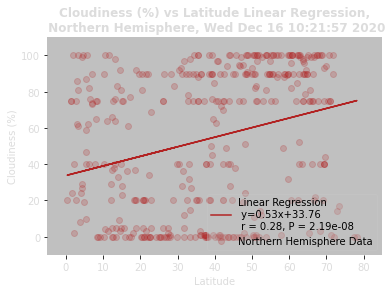

In [71]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot8= plt.subplot(111)
plot8.spines["top"].set_visible(False)    
plot8.spines["bottom"].set_visible(False)    
plot8.spines["right"].set_visible(False)    
plot8.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 110)    
plt.xlim(-5,85)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Northern'
#data for plot
lat=north_df['lat']
y_value=north_df['Cloudiness (%)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 101, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot8=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='lower right', framealpha=0.3)
plt.savefig('output_data/cloud_north_r.png', facecolor='dimgray')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

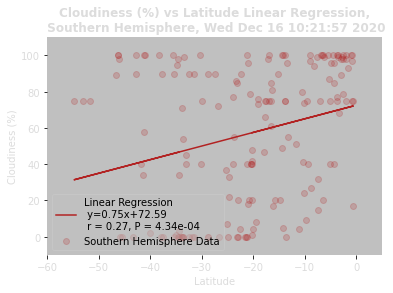

In [73]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot7= plt.subplot(111)
plot7.spines["top"].set_visible(False)    
plot7.spines["bottom"].set_visible(False)    
plot7.spines["right"].set_visible(False)    
plot7.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 110)    
plt.xlim(-60,5)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Southern'
#data for plot
lat=south_df['lat']
y_value=south_df['Cloudiness (%)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 101, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot7=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='lower left', framealpha=0.5)
plt.savefig('output_data/cloud_south_r.png', facecolor='dimgray')

Both hemisphere's cloudiness vs latitude correlations are positive, but correlation is weak - similar to humidity

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

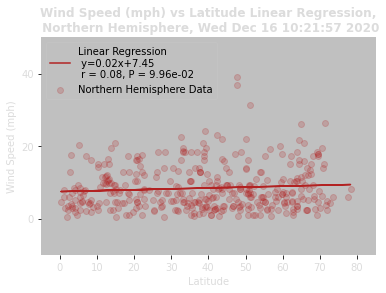

In [76]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot8= plt.subplot(111)
plot8.spines["top"].set_visible(False)    
plot8.spines["bottom"].set_visible(False)    
plot8.spines["right"].set_visible(False)    
plot8.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 50)    
plt.xlim(-5,85)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Northern'
#data for plot
lat=north_df['lat']
y_value=north_df['Wind Speed (mph)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 50, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot8=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='upper left', framealpha=0.3)
plt.savefig('output_data/wind_north_r.png', facecolor='dimgray')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

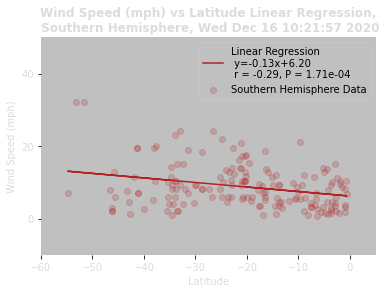

In [79]:
#setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams['axes.facecolor'] = 'silver'
plot7= plt.subplot(111)
plot7.spines["top"].set_visible(False)    
plot7.spines["bottom"].set_visible(False)    
plot7.spines["right"].set_visible(False)    
plot7.spines["left"].set_visible(False)
#Plot limits
plt.ylim(-10, 50)    
plt.xlim(-60,5)
#colors
color_t='gainsboro'
colors='firebrick'
#hemisphere
hem='Southern'
#data for plot
lat=south_df['lat']
y_value=south_df['Wind Speed (mph)']
y_name=y_value.name
#setting up plot
plt.yticks(range(0, 50, 20), color=color_t,fontsize=10)    
plt.xticks(fontsize=10, color='gainsboro')
plt.title(f'{y_name} vs Latitude Linear Regression,\n {hem} Hemisphere, {my_date}', color=color_t,fontweight="bold")
plt.ylabel(y_name, color=color_t)
plt.xlabel('Latitude', color=color_t)
plot7=plt.scatter(lat,y_value,color=colors, 
                  marker='o',alpha=0.2,
                  label=F'{hem} Hemisphere Data')
# Calculate the correlation coefficient and linear regression model 
slope, inter, r, p, std_err = linregress(lat.astype(float), y_value.astype(float))
# linear regression model
fit = slope * lat + inter
# plot linear regression line
plt.plot(lat,fit,"-", color=colors,
         label=f"Linear Regression \n y={slope:.2f}x+{inter:.2f}\n r = {r:.2f}, P = {p:.2e} ")
plt.legend(loc='upper right', framealpha=0.5)
plt.savefig('output_data/wind_south_r.png', facecolor='dimgray')

both Hemispheres Wind Speed vs latitude correlations are weak